___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.12


In [2]:
#!pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

'2.9.1'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [7]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [8]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [10]:
# 2 label ve 1 tane target var. 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


In [12]:
## DL te data distribution cok onemli

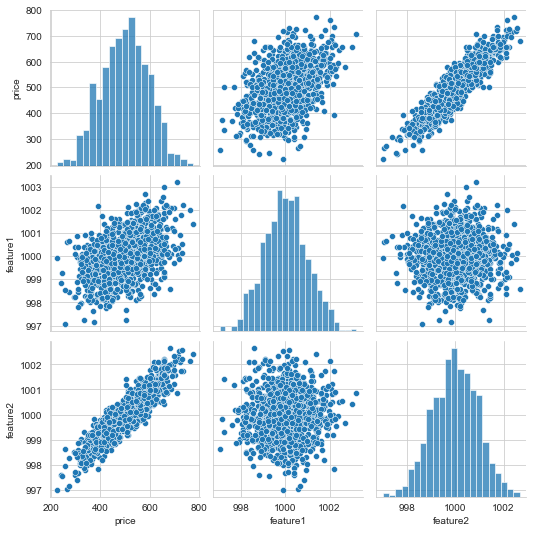

In [13]:
sns.pairplot(df);

In [14]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


In [15]:
#multicorr DLde onemli degil

## Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# X = df[['feature1', 'feature2']].values
# y = df['price'].values

In [18]:
#array kullanir cunku  feature fazla.

In [19]:
X = df[['feature1', 'feature2']]
y = df['price']

In [20]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [21]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
X_train.shape

(700, 2)

In [24]:
X_test.shape

(300, 2)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [27]:
scaler = MinMaxScaler()

In [28]:
# minmax scalar kullanirken outlier olmamasina dikkat etmeli
#tum degerler 0-1 arasina gelir

In [29]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# fit parametre ogrenme ile bagli

In [31]:
#'fit scalar ogrenmesi 

## Modelling

In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [34]:
#Sequential ard arda diziyor

In [35]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [36]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [37]:
#dense kendinden onceki ve sonraki noranlara bagli ise dense layer. 

In [38]:
X_train.shape

(700, 2)

In [39]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [40]:
# bu method cok kullanilmiyor..

In [41]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [42]:
# input layer olusturmadan add icine input layer yaziyoruz

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.97666526,  0.19987416,  0.01985192,  0.63763165],
        [ 0.26374745,  0.8103583 , -0.6823642 ,  0.80699444]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.6676157 , -0.50654334,  0.4791594 ,  0.5964393 ],
        [ 0.6634583 ,  0.1412403 ,  0.31660682,  0.772639  ],
        [-0.5986028 ,  0.6468788 , -0.7285209 , -0.13694412],
        [-0.5425764 , -0.38653585, -0.1676383 , -0.815462  ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.7288659 , -0.7947515 ,  0.6188335 ,  0.683209  ],
        [-0.22927421,  0.45321542,  0.79038864, -0.706138  ],
        [-0.7011859 ,  0.50109047,  0.3833

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [45]:
model.compile(optimizer = "rmsprop", loss = "mse")
#adam=lr (learning rate)
#loss=how loss calculated
#

In [46]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256653.0000
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256556.5000
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256448.1875
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256313.7188
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256153.0312
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255968.4062
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255737.6406
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255461.8438
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255146.1719
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254786.4688
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254373.0938
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

Epoch 96/250
22/22 [==============================] - 0s 788us/step - loss: 777.9832
Epoch 97/250
22/22 [==============================] - 0s 738us/step - loss: 750.3719
Epoch 98/250
22/22 [==============================] - 0s 814us/step - loss: 722.0770
Epoch 99/250
22/22 [==============================] - 0s 758us/step - loss: 695.3809
Epoch 100/250
22/22 [==============================] - 0s 760us/step - loss: 665.0423
Epoch 101/250
22/22 [==============================] - 0s 760us/step - loss: 644.2017
Epoch 102/250
22/22 [==============================] - 0s 760us/step - loss: 617.3660
Epoch 103/250
22/22 [==============================] - 0s 712us/step - loss: 597.9927
Epoch 104/250
22/22 [==============================] - 0s 760us/step - loss: 576.3997
Epoch 105/250
22/22 [==============================] - 0s 806us/step - loss: 553.9312
Epoch 106/250
22/22 [==============================] - 0s 880us/step - loss: 530.3795
Epoch 107/250
22/22 [==============================] - 0s 

Epoch 192/250
22/22 [==============================] - 0s 740us/step - loss: 24.1541
Epoch 193/250
22/22 [==============================] - 0s 760us/step - loss: 24.4350
Epoch 194/250
22/22 [==============================] - 0s 807us/step - loss: 24.7128
Epoch 195/250
22/22 [==============================] - 0s 805us/step - loss: 24.0063
Epoch 196/250
22/22 [==============================] - 0s 813us/step - loss: 24.3343
Epoch 197/250
22/22 [==============================] - 0s 813us/step - loss: 24.5576
Epoch 198/250
22/22 [==============================] - 0s 820us/step - loss: 24.7674
Epoch 199/250
22/22 [==============================] - 0s 836us/step - loss: 24.2563
Epoch 200/250
22/22 [==============================] - 0s 776us/step - loss: 24.7247
Epoch 201/250
22/22 [==============================] - 0s 760us/step - loss: 24.2145
Epoch 202/250
22/22 [==============================] - 0s 760us/step - loss: 24.5210
Epoch 203/250
22/22 [==============================] - 0s 755us/s

In [47]:
#fit demeke training our model

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.8064322 ,  2.068152  ,  0.01161994,  0.1709146 ],
        [ 2.6652708 ,  3.304302  , -0.6855265 ,  0.34596497]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.53854144,  0.62649137, -0.00835497, -0.46286666], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 1.9976268 ,  1.101155  ,  2.144095  ,  2.251977  ],
        [ 2.0044198 ,  1.8439931 ,  2.1138375 ,  2.5858326 ],
        [-0.5986028 ,  0.6468788 , -0.72244644, -0.13694412],
        [-0.5620601 , -0.06028809,  0.24380781, -0.38525194]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.15092069, 0.506411  , 0.59905046, 0.615689  ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.7288659 ,  0.91235024,  2.30358   ,  2.3708565 ],
        [-0.22927421,  2.0083256 ,  

In [50]:
model.history.history

{'loss': [256653.0,
  256556.5,
  256448.1875,
  256313.71875,
  256153.03125,
  255968.40625,
  255737.640625,
  255461.84375,
  255146.171875,
  254786.46875,
  254373.09375,
  253891.34375,
  253328.203125,
  252674.484375,
  251927.25,
  251094.28125,
  250160.453125,
  249117.53125,
  247955.125,
  246681.984375,
  245277.625,
  243738.15625,
  242050.875,
  240192.875,
  238183.21875,
  235997.046875,
  233640.25,
  231088.640625,
  228346.0625,
  225394.53125,
  222262.859375,
  218891.078125,
  215303.15625,
  211501.875,
  207482.765625,
  203225.6875,
  198733.515625,
  194024.359375,
  189050.953125,
  183817.71875,
  178400.671875,
  172744.5,
  166825.734375,
  160709.609375,
  154356.46875,
  147813.875,
  141034.546875,
  134138.828125,
  127047.4609375,
  119786.4453125,
  112461.3515625,
  105026.625,
  97483.109375,
  89887.390625,
  82326.75,
  74797.796875,
  67289.6640625,
  59892.3671875,
  52722.8515625,
  45767.12109375,
  39014.078125,
  32636.865234375,
  2667

In [51]:
pd.DataFrame(model.history.history)

,loss
0,256653.000
1,256556.500
2,256448.188
3,256313.719
4,256153.031
...,...
245,24.538
246,24.257
247,24.547
248,23.989


<AxesSubplot:>

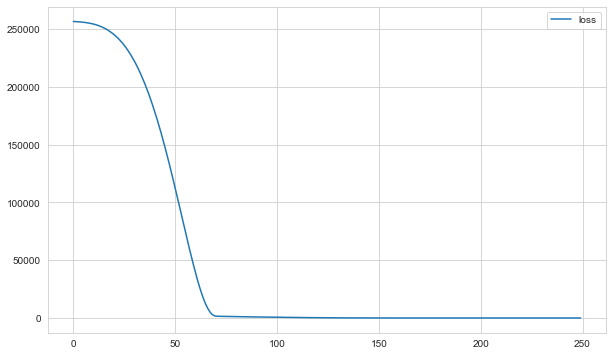

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

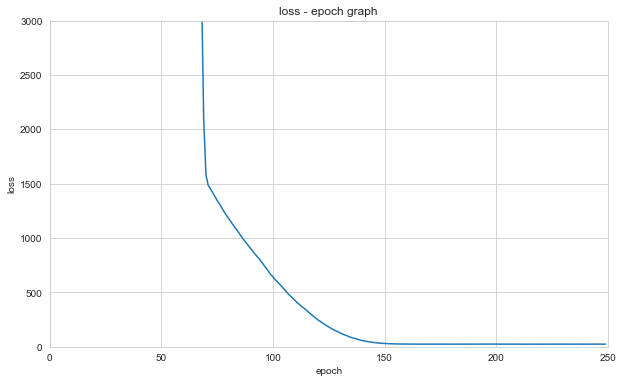

In [55]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
model.evaluate(X_train, y_train, verbose=0)

24.20590591430664

In [58]:
model.evaluate(X_test, y_test, verbose=0)

25.011672973632812

In [59]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 997us/step


In [60]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
84,467.461,460.744
88,441.950,435.910
596,516.986,519.524
783,273.433,272.951
829,493.570,487.606
589,549.291,543.000
526,556.832,560.053
799,528.440,514.871
924,664.509,668.593
925,503.050,510.433


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

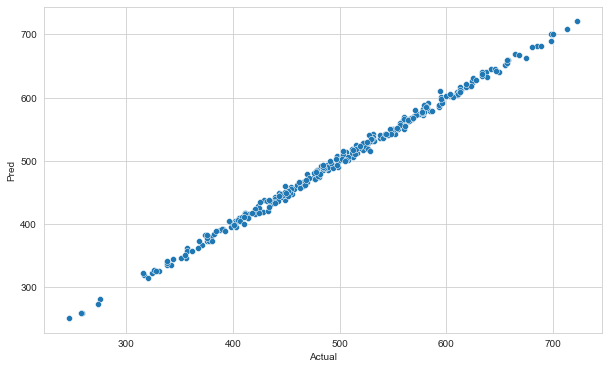

In [61]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [62]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [63]:
eval_metric(y_test, y_pred)

r2_score: 0.9971551892260319 
mae: 4.0026333961625 
mse: 25.011666406835495 
rmse: 5.001166504610249


## Final Model and Model Deployment

### Final Model Training

In [64]:
scaler = MinMaxScaler().fit(X)

In [65]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [66]:
X_scaled = scaler.transform(X)

In [67]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 257122.7656
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 256874.5625
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 256546.0781
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 256135.8750
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 255619.4531
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 254990.6094
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 254213.4375
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 253271.3750
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 252128.6719
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 250776.2969
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 249175.7344
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 1ms/step - loss: 27.8091
Epoch 99/250
32/32 [==============================] - 0s 1ms/step - loss: 26.9601
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 26.3863
Epoch 101/250
32/32 [==============================] - 0s 1ms/step - loss: 26.1056
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 25.8227
Epoch 103/250
32/32 [==============================] - 0s 1ms/step - loss: 25.5489
Epoch 104/250
32/32 [==============================] - 0s 1ms/step - loss: 25.5514
Epoch 105/250
32/32 [==============================] - 0s 1ms/step - loss: 25.6560
Epoch 106/250
32/32 [==============================] - 0s 1ms/step - loss: 25.2105
Epoch 107/250
32/32 [==============================] - 0s 1ms/step - loss: 25.3035
Epoch 108/250
32/32 [==============================] - 0s 1ms/step - loss: 25.3203
Epoch 109/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5884
Epoch 110/250
32/32

32/32 [==============================] - 0s 1ms/step - loss: 24.6047
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8995
Epoch 198/250
32/32 [==============================] - 0s 1ms/step - loss: 25.3551
Epoch 199/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8378
Epoch 200/250
32/32 [==============================] - 0s 1ms/step - loss: 24.9056
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4777
Epoch 202/250
32/32 [==============================] - 0s 1ms/step - loss: 25.0383
Epoch 203/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5869
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 25.4379
Epoch 205/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8077
Epoch 206/250
32/32 [==============================] - 0s 1ms/step - loss: 25.1522
Epoch 207/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5743
Epoch 208/250
32/3

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [68]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [69]:
#final_model.save("model_fake_reg") 

### Loading Model

In [70]:
from tensorflow.keras.models import load_model

In [71]:
model_fake_reg = load_model('model_fake_reg.h5')

In [72]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [73]:
sample = [[998, 1000]]

In [74]:
sample_scaled = scaler_fake_reg.transform(sample)

In [75]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 70ms/step


array([[418.21817]], dtype=float32)

## Prediction-2

In [76]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [77]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [78]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [79]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 21ms/step


array([[378.2393 ],
       [330.00766],
       [281.77606],
       [233.54442],
       [185.31279]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___